# <font color=crimson> Section 1. Data Preparation
#### <font color=crimson> This part of the assignment focuses on the description and preparation of the dataset chosen by the student.

In [1]:
#I import all libraries that will be used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#I start by importing the chosen dataset (Kidney_disease) into Jupyter using pandas
data = pd.read_csv('kidney_disease.csv', sep=',') #import file into variable 'data'

#I'll apply general cleaning steps based on what I could spot while scrolling through the dataset (leading '/tab' & '?' instead of blank)
data.replace('\t', '', regex=True, inplace=True) #to remove the '/t'
data.replace("?", pd.NA, inplace=True) #to replace '?' by standard NA value
data = data.drop(columns=["id"]) #I don't need this index column, I drop it to not pollute the data

#I show data to visualize the import
print(data.shape) #to check how many instances & features are available
display(data) #to visualize a summary of the data in a tabular format

(400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


## <font color=crimson> Question 1.1.: Dataset Description (10pts)

<div class="alert alert-info" style="margin: 10px"><strong>Note:</strong> 
<br>In the info.txt document linked to the dataset, there is general description of the dataset and details about each attribute which I'm using to answer question A. & B.
</div>

### <font color=crimson> A. How many features does the dataset have? Is there a target variable?
- There are 24 features in this dataset, and a target (25 columns in total).

### <font color=crimson> B. How many features are numerical, textual, categorical or Boolean? Is there any statistical dependency between the features?
- numerical: 11 (age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc)
- textual: 0
- categorical: 3 (sg,al,su)
- boolean: 10 (rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane)

In [2]:
#I'll convert values into their expected data type
#To do that, I create a subset for numerical & nominal features
numerical_columns = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
nominal_columns = ['sg','al','su','rbc', 'pc', 'pcc', 'ba','htn','dm','cad','appet','pe','ane','classification'] #I include the boolean target

#I convert the values
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')
data[nominal_columns] = data[nominal_columns].astype('category')

#I print the result
print(f"Numerical columns :\n{data[numerical_columns].dtypes}")
print(f"\nNominal Columns :\n{data[nominal_columns].dtypes}")

Numerical columns :
age     float64
bp      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv     float64
wc      float64
rc      float64
dtype: object

Nominal Columns :
sg                category
al                category
su                category
rbc               category
pc                category
pcc               category
ba                category
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object


In [3]:
#Now that each feature as the right data type, I'll validate that nominal features have the expected values (based on info.txt)

#I create a subset for categorical & boolean features to check them separately
categorical_columns = ['sg','al','su']
boolean_columns = ['rbc', 'pc', 'pcc', 'ba','htn','dm','cad','appet','pe','ane','classification']
    
# I print the unique values of each feature
print("Categorical Features:")
for column in categorical_columns:
    unique_values = list(data[column].unique())
    print(f"Unique value of '{column}': {unique_values}")

# For Booleans, I also print the count of unique values to easily spot >2
print("")
print("Boolean Features:")
for column in boolean_columns:
    unique_values = list(data[column].unique())
    num_unique_values = data[column].nunique()
    print(f"Unique value of '{column}': {unique_values}, {num_unique_values}")

Categorical Features:
Unique value of 'sg': [1.02, 1.01, 1.005, 1.015, nan, 1.025]
Unique value of 'al': [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]
Unique value of 'su': [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]

Boolean Features:
Unique value of 'rbc': [nan, 'normal', 'abnormal'], 2
Unique value of 'pc': ['normal', 'abnormal', nan], 2
Unique value of 'pcc': ['notpresent', 'present', nan], 2
Unique value of 'ba': ['notpresent', 'present', nan], 2
Unique value of 'htn': ['yes', 'no', nan], 2
Unique value of 'dm': ['yes', 'no', ' yes', nan], 3
Unique value of 'cad': ['no', 'yes', nan], 2
Unique value of 'appet': ['good', 'poor', nan], 2
Unique value of 'pe': ['no', 'yes', nan], 2
Unique value of 'ane': ['no', 'yes', nan], 2
Unique value of 'classification': ['ckd', 'notckd'], 2


In [4]:
#All Categorical features are matching their expected values from info.txt
#There is 1 Boolean feature with 3 values due to a leading space, which we will clean

data['dm'] = data['dm'].str.strip() #remove the leading space
print(data['dm'].unique())

['yes' 'no' nan]


<div class="alert alert-info" style="margin: 8px" ><strong> Note: </strong> 
<br>I am now confident enough with the quality of my data to go to next step and look at statistical dependencies
</div>

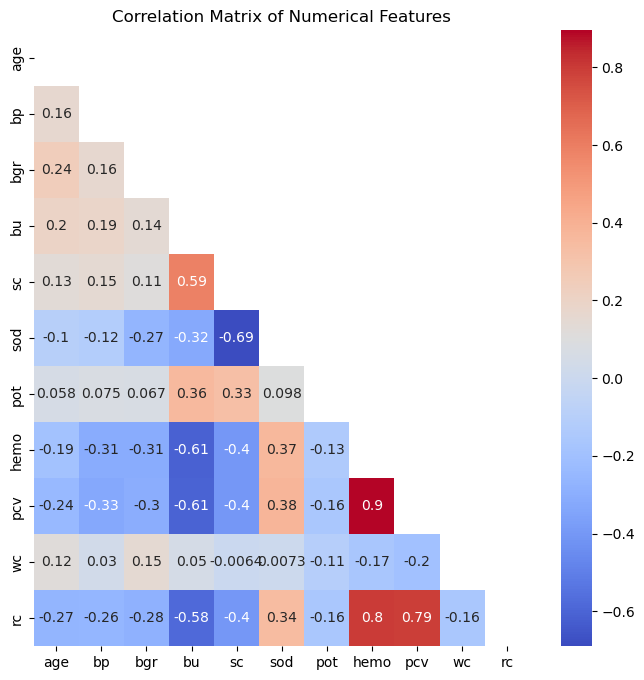

In [5]:
#I'll look at statistical dependencies between numerical features doing a correlation analysis

correlation_matrix = data[numerical_columns].corr() #apply to numerical data only

#I create a heatmap to visualize the result and easily identify the strong correlations
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Create a mask to display only the lower triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<div class="alert alert-warning" style="margin: 10px"><strong> Interpretation: </strong> 
<br>
<br>
Based on the heatmap result, I consider that:  
<br>≥ |0.75| = strong correlation  
<br>≥ |0.5| & < |0.75| = medium correlation  
<br>≥ |0.2| & < |0.5| = low correlation  
<br>< |0.2| = unsignificant correlation   
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>
<br>
Statistical Dependencies:  
<br>- Strong: pcv & hemo ;  rc & hemo ; pcv & rc  
<br>- Medium: bu & rc ; bu & pcv ; bu & hemo ; sc & sod ; bu & sc    
<br><br>The above results can be very useful for the data cleansing step (e.g. if I want to fill blanks with an average based on another feature which has strong dependencies).
</div>    

## Tom Q1.1: Features and target understood. Feature types correctly identified. Correlations presented using a heatmap. Task correctly identified as supervised classification task. 10/10

### <font color=crimson> C. Identify the best suited task for the chosen dataset. Is this a supervised or unsupervised data mining task? Is it a) clustering, b) classification or c) regression task?
-> This is a supervised binary classification task
- Supervised considering the target variable 'classification' is known
- Classification considering each attribute is linked to a target 'classification', and we want to predict what would be the target value (binary result 'ckd' or 'notckd') of a new instance based on its attributes
    
## <font color=crimson>Question 1.2.: Data quality and data cleansing (10pts)

### <font color=crimson>A. Are there missing values in the data? Explain the most common techniques used to deal with missing values in a dataset. Show how you would perform this analysis in Python.

Yes, there are missing values in the dataset.  
There are multiple ways to clean missing values:
- removing the instances
- filling with a constant (mean of all values of other non-missing numerical instances, mode for nominal instances)
- filling with a neighboor guess (mean of all values of instances in the neighborhood to preserve the pattern for numerical instances, mode for nominal instances)
- filling with a model guess (e.g. Bayesian models)

In [6]:
#I check how many missing instances we have in our dataset

print(f"Missing values in numerical features:\n{data[numerical_columns].isnull().sum()}\n")
print(f"Missing values in nominal features:\n{data[nominal_columns].isnull().sum()}")

Missing values in numerical features:
age       9
bp       12
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

Missing values in nominal features:
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I do not have enough experience with ML to assess the best approach to deal with those missing values.
    Thus, I decided to drop all missing values which is the simplest way forward, and I'll re-consider my choice in case the result of the algorithm are not satisfying enough.  
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong>   
<br>Before simply removing all the blanks, I'll check if I can drop some features that I deem not necessary by visualizing their relationship with the target
</div>

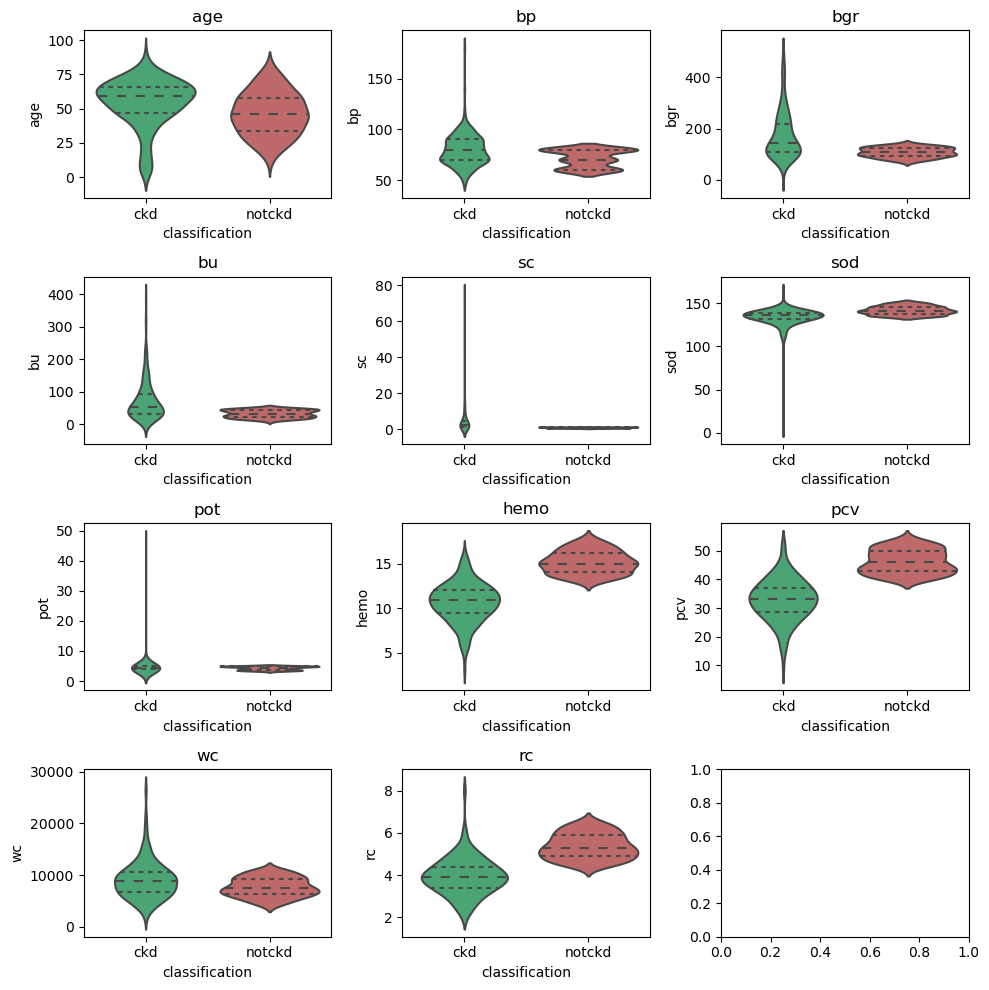

In [7]:
# I start with the numerical values. I'll use a violinplot from sns to assess the relationship of each numerical feature with the target.

# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()

# Iterate through each numerical column and create a violin plot
for i, col in enumerate(numerical_columns):
    sns.violinplot(x='classification', y=col, data=data, inner='quartile', showfliers=False, palette=['mediumseagreen', 'indianred'], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<div class="alert alert-warning" style="margin: 10px"><strong> Interpretation: </strong> 
<br> Violin visuals for numerical features help me to assess if the spread of the feature is similar or not depending on the target.  
<br>Thanks to that, I can say that: bp, sod, pot & wc have no relationship with the target.  
<br>Considering the quantity of blanks in my dataset, I'll drop all those features.
</div>

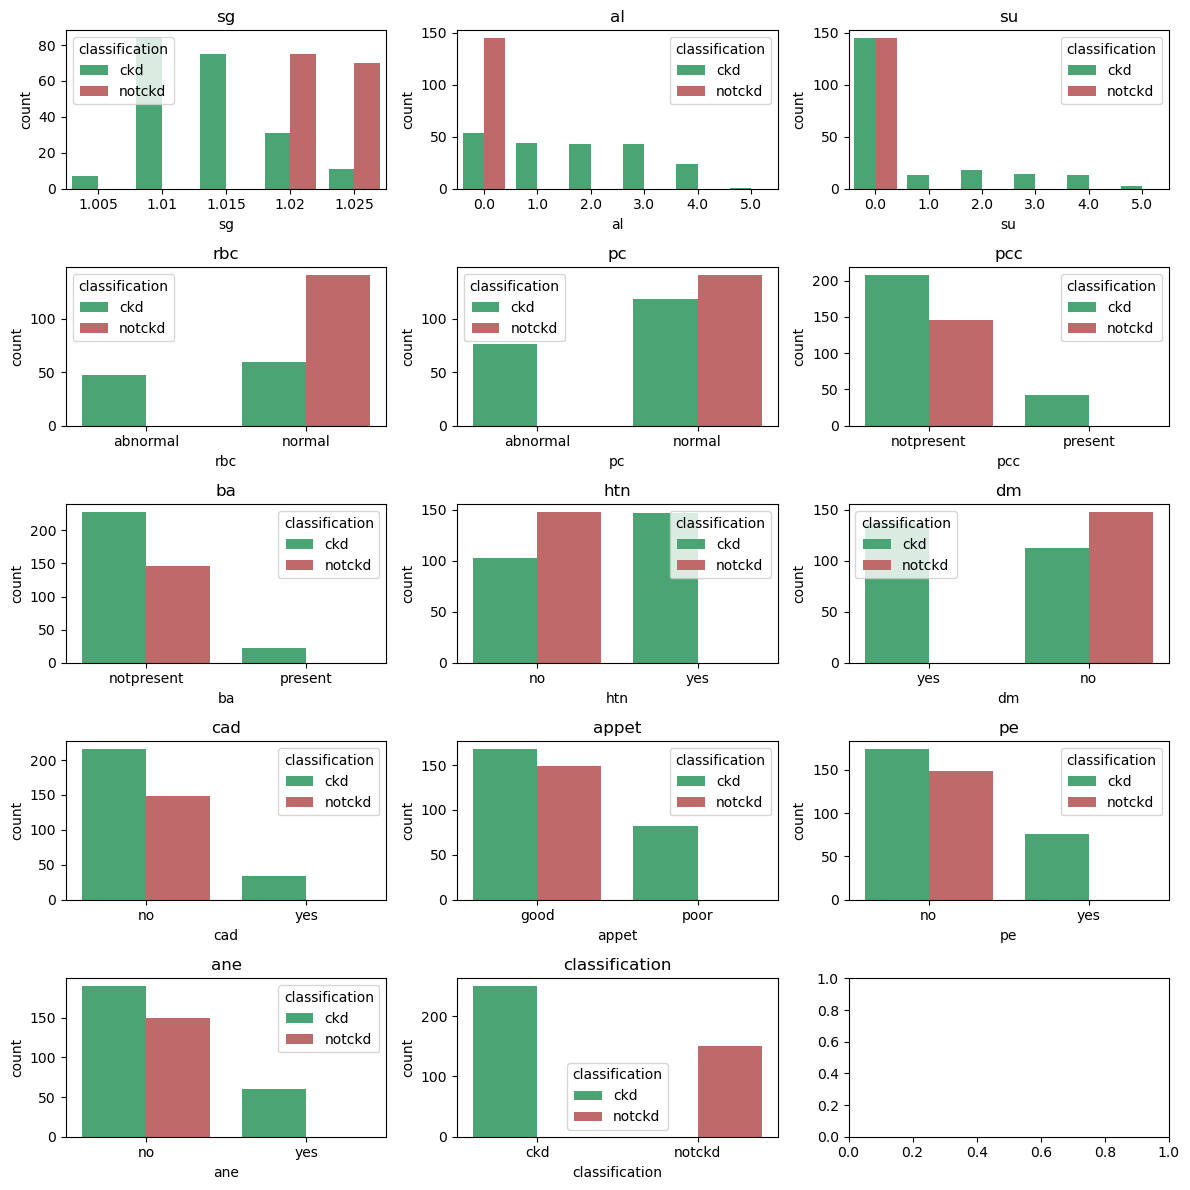

In [8]:
## I continue with the nominal values. I'll use a countplot from sns to assess the relationship of each numerical feature with the target.

# Set up the subplot grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))
axes = axes.flatten()

# Iterate through each nominal column and create a bar chart
for i, col in enumerate(nominal_columns):
    sns.countplot(x=col, hue='classification', data=data, palette=['mediumseagreen', 'indianred'], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<div class="alert alert-warning" style="margin: 10px"><strong> Interpretation: </strong> 
<br> Countplot visuals for nominal features help me to assess if one feature has no relationship with the target (e.g. same spread of the feature values for 'ckd' & 'notckd').  
<br>Thanks to that, I can say that all nominal features have a relationship with the target.
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br> Looking more in details, we have 2 features linking to the same parameters of the patient: rc (red blood cell count) & rbc (red blood cells).  
<br>It's not necessary to keep a duplicate information, so I'll drop rbc which contains more blanks.
</div>

In [9]:
cleaned_data = data.drop(columns=['bp','sod','pot','wc','rbc']) #dropping the features I deemed not necessary above
cleaned_data = cleaned_data.dropna()
display(cleaned_data.head())

#I also update my subsets
cleaned_numerical_columns = ['age','bgr','bu','sc','hemo','pcv','rc']
cleaned_nominal_columns = ['sg','al','su', 'pc', 'pcc', 'ba','htn','dm','cad','appet','pe','ane','classification']

,age,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44.0,5.2,yes,yes,no,good,no,no,ckd
3,48.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35.0,4.6,no,no,no,good,no,no,ckd
7,24.0,1.015,2.0,4.0,abnormal,notpresent,notpresent,410.0,31.0,1.1,12.4,44.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,1.015,3.0,0.0,abnormal,present,notpresent,138.0,60.0,1.9,10.8,33.0,4.0,yes,yes,no,good,no,yes,ckd


### <font color=crimson>B. Are the classes balanced? Explain the most common techniques used to deal with the class imbalance problem.

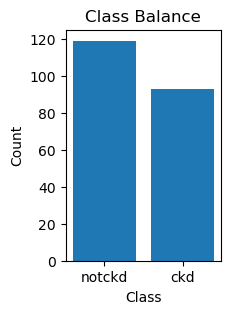

notckd    56.132075
ckd       43.867925
Name: classification, dtype: float64


In [10]:
#I want to visualize the balance of the class and it's % representation
class_count = cleaned_data['classification'].count() #to count the total instances
class_vcounts = cleaned_data['classification'].value_counts() #to count the instances per boolean value

#to create the visual of the balance
plt.figure(figsize=(2, 3))
plt.bar(class_vcounts.index, class_vcounts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()

#to show the % representation of the balance
print(class_vcounts / class_count * 100)

Yes, the classes are almost perfectly balanced (56% of notckd for 44% of ckd).

If the classes are not balanced, we can use the following common techniques:
- Oversampling the minority class : consists of providing more copies of the minority class samples.
- Undersampling the majority class: consists of removing some samples from the majority class.

Over/undersampling has to be done after splitting the dataset into train & test.

### <font color=crimson>C. Are there outliers in the dataset? Show how you would perform the analysis in Python

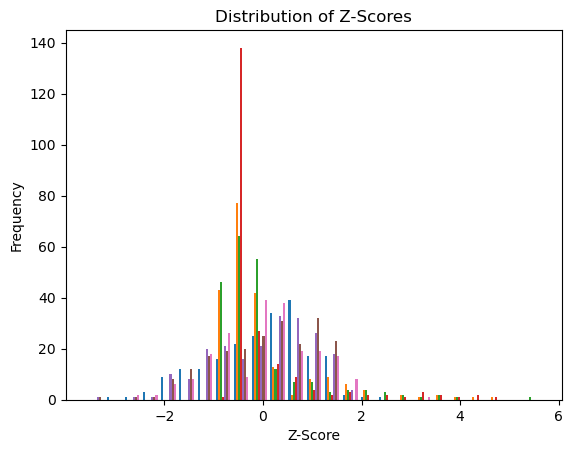

In [11]:
#In order to identify if we have outliers in the dataset, I'll run a z-score analysis and visualize the spread on a histogram.

from scipy import stats

z_scores = stats.zscore(cleaned_data[cleaned_numerical_columns])

plt.hist(z_scores, bins=25)
plt.title("Distribution of Z-Scores")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.show()

<div class="alert alert-warning" style="margin: 10px"><strong> Interpretation: </strong> 
<br> The visual enables me to visualize the spread we have on the z-score, which also helps me to understand if I have outliers or not, and the quantity of those.
<br> Looking at the spread, I'll consider anything with z-score >3 | <3  as an outlier. 
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>In order to not pollute my data, I'll drop all instances that have at least 1 outlier.
</div>  

In [12]:
threshold = 3 # Set the threshold for Z-scores
outliers = (z_scores > threshold) | (z_scores < -threshold) # Identify outliers based on the threshold
cleaned_data_no_outliers = cleaned_data[~outliers.any(axis=1)] # Drop rows with outliers

display(cleaned_data_no_outliers.head())

,age,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,44.0,5.2,yes,yes,no,good,no,no,ckd
3,48.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,32.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,35.0,4.6,no,no,no,good,no,no,ckd
8,52.0,1.015,3.0,0.0,abnormal,present,notpresent,138.0,60.0,1.9,10.8,33.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,1.020,2.0,0.0,abnormal,present,notpresent,70.0,107.0,7.2,9.5,29.0,3.7,yes,yes,no,poor,no,yes,ckd


## Tom Q1.2: Missing values identified and removed by dropping them, other strategies also described. Numerical features with low dependence on target identified using violin plots and have been dropped. Although these features seem to have a low correlation to the target, they may have a non-linear dependence when combined with other features. Feature selection techniques could be used to confirm this. Class imbalance shown using a bar chart. It is mentioned that the classes are almost perfectly balanced, however, I would argue that this may need to be addressed to train optimal models. Relevant strategies are described. Outliers identified and removed using z-score approach. 9/10

# <font color=crimson>Section 2. Data Exploration
#### <font color=crimson>This part of the assignment focuses on the exploration of the dataset. Using visualisation tools insight on the features distribution and relationship to the target can be gathered.

## <font color=crimson>Question 2: Visualisation and Interpretation.(10pts)

### <font color=crimson>A. Plot the dataset with Python using three charts from Seaborn or Matplotlib library


### <font color=crimson>B. Describe and interpret each plot.

I have been using various visuals in the section 1 'Data Preparation' as it's easier for me to work with visuals rather than numbers only. 

I refer to:  
- Correlation Matrix Heatmap to find statistical dependencies between numerical features
- Countplot to find relationship between nominal features and the target
- Violinplot to find relationship between numerical features and the target
- Histogram to analyze the distribution of numerical values using z-score and remove outliers

I have also interpreted each visual when using them.
I don't feel like I need extra visual to explore deeper the data, I already have a good idea of what features will impact the results, and I want to move on to modelling part to get a first outcome. In case the result is not satisfactory, I'll get back to exploring the data.
<div class="alert alert-warning" style="margin: 10px"><strong> Interpretation: </strong> 
<br> Refer to those cells above.
</div>

## Tom Q2: Four different visualizations with relevant discussion for each. 10/10

# <font color=crimson>Section 3. Data Analysis
#### <font color=crimson>Using the cleansed dataset from Section 1 and relationship insight from Section 2. In this Section a suitable model using machine learning techniques will be developed.
    
## <font color=crimson>Question 3: Modelling and Evaluation(10pts)



<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br> Most ML algorithm work better with numerical values, so I will encode my boolean features (they all contain text ; the nominal features already have numerical values)
    <br> Then, I'll split my dataset into a train_dataset and a test_dataset to ensure my model will not overfit my dataset.
</div>





In [13]:
#I import libraries to oversample & split my dataset
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# I define as per standard approach my features being x and my target being y
x = cleaned_data_no_outliers.drop(columns=['classification'])
y = cleaned_data_no_outliers['classification']

# I encode my boolean features
boolean_columns = ['pc', 'pcc', 'ba','htn','dm','cad','appet','pe','ane'] # I re-define the boolean features
le = LabelEncoder() # I instantiate the encoder

for column in boolean_columns:
    x[column] = le.fit_transform(x[column]) #encoder expects a 1D array, so I need to iterate through the features

# I split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

display(x_train.head()) #doing a visual check

# I check the class distribution before oversampling
#print("Class distribution before oversampling:")
#print(y_train.value_counts())

# I create a RandomOverSampler & fit my dataset
#oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
#x_train, y_train = oversampler.fit_resample(x_train, y_train)

# I check the class distribution after oversampling
#print("Class distribution after oversampling:")
#print(y_train.value_counts())

,age,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,rc,htn,dm,cad,appet,pe,ane
323,43.0,1.025,0.0,0.0,1,0,0,130.0,30.0,1.1,15.9,45.0,4.5,0,0,0,0,0,0
22,48.0,1.025,4.0,0.0,0,0,0,95.0,163.0,7.7,9.8,32.0,3.4,1,0,0,0,0,1
310,46.0,1.020,0.0,0.0,1,0,0,102.0,27.0,0.7,13.2,44.0,5.4,0,0,0,0,0,0
357,66.0,1.025,0.0,0.0,1,0,0,107.0,16.0,1.1,13.6,42.0,4.9,0,0,0,0,0,0
14,68.0,1.010,3.0,2.0,0,1,1,157.0,90.0,4.1,5.6,16.0,2.6,1,1,1,1,1,0


<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I choose a test_size of 0.2 originally but all my models were getting an accuracy of 1. I couldn't find any obvious root cause for overfitting, so I decided to increase the size of the test_size assuming overfitting is due to the low amount of data I have. By increasing the test_size to 0.4, my algorithm seem to not overfit anymore.
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I originally oversampled my train_sets to have a perfect 50/50 balance but our professor said it is not required for a small unbalance of 56/44 (and it had no major imapct on the models performance). Thus, I kept the code in there but don't run it anymore.
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I now consider my dataset is ready to run algorithms
</div>

### <font color=crimson>A. Analyse the data with three different algorithms using Python.

    
I've decided to choose the following algorithms for my binary classification task:
- K-Nearest Neighbors (KNN): Simple, non-parametric and can handle non-linear data -> KNN is sensitive to scaling & categorical features need encoding
- Naive Bayes: Simple, efficient, and works well with categorical features -> no categorical features encoding needed & not sensitive to scaling
- Logistic Regression: Simple, interpretable, and efficient for linear data -> require categorical features encoding
    
With those, I am covering various possibilities which might apply with my dataset: linear data, non-linear data & categorical features.

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I start with KNN classifier
</div>

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt

#I start by normalizing my numerical data as KNN algorithm is sensitive to non-homogeneous data
numerical_columns = ['age','bgr','bu','sc','hemo','pcv','rc']
x_train_scaled = x_train.copy() #I do a copy as I don't only have numerical features to be scaled
x_test_scaled = x_test.copy()
scaler = MinMaxScaler()
x_train_scaled[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test_scaled[numerical_columns] = scaler.transform(x_test[numerical_columns])

#I initialize the KNN classifier & train it
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_scaled, y_train)

# I make predictions on the test set
y_pred_knn = knn_classifier.predict(x_test_scaled)

#I print classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.93      0.97        30
      notckd       0.96      1.00      0.98        48

    accuracy                           0.97        78
   macro avg       0.98      0.97      0.97        78
weighted avg       0.98      0.97      0.97        78



<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I also tried with more neighbors but 3 performs the best. It's important to keep an uneven number since it's a binary classification.
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I continue with Naive Bayes classifier
</div>

In [15]:
from sklearn.naive_bayes import GaussianNB

#I initialize the NB classifier & train it
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# I make predictions on the test set
y_pred_nb = nb_classifier.predict(x_test)

#I print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.97      0.98        30
      notckd       0.98      1.00      0.99        48

    accuracy                           0.99        78
   macro avg       0.99      0.98      0.99        78
weighted avg       0.99      0.99      0.99        78



<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I finish with Logistic Regression classifier
</div>

In [16]:
from sklearn.linear_model import LogisticRegression

#I initialize the LG classifier & train it
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(x_train_scaled, y_train) #I'm using scaled data as I'm getting an error when using non-scaled one (asking to increase nbr of iterations or to scale the data)

# I make predictions on the test set
y_pred_lr = lr_classifier.predict(x_test_scaled)

#I print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.90      0.95        30
      notckd       0.94      1.00      0.97        48

    accuracy                           0.96        78
   macro avg       0.97      0.95      0.96        78
weighted avg       0.96      0.96      0.96        78



### <font color=crimson>B. Interpret the results using suitable metrics and explain which of the algorithms performs the best.

<AxesSubplot: title={'center': 'Consufion Matrix LR'}, xlabel='Predicted label', ylabel='True label'>

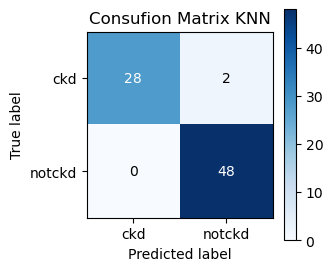

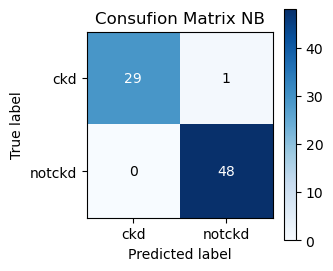

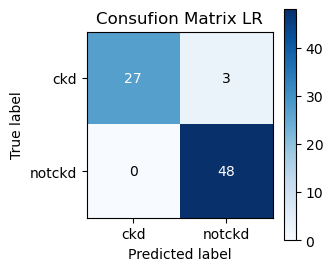

In [17]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=False, figsize=(3,3),cmap='Blues', title="Consufion Matrix KNN")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_nb, normalize=False, figsize=(3,3),cmap='Blues', title="Consufion Matrix NB")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=False, figsize=(3,3),cmap='Blues', title="Consufion Matrix LR")

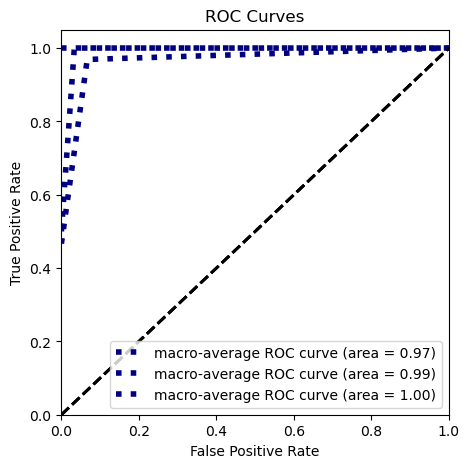

In [22]:
svc_disp = skplt.metrics.plot_roc(y_test,knn_classifier.predict_proba(x_test_scaled),classes_to_plot=1,plot_micro=False, figsize=(5,5),cmap='Reds')
rfc_disp = skplt.metrics.plot_roc(y_test,nb_classifier.predict_proba(x_test),classes_to_plot=1,plot_micro=False, cmap='Purples', ax=svc_disp)
rfc_disp = skplt.metrics.plot_roc(y_test,lr_classifier.predict_proba(x_test_scaled),classes_to_plot=1,plot_micro=False, cmap='Greens', ax=svc_disp)

plt.show()

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br>I have spent hours and hours trying to understand best way to evaluate my models, and mapping the ROC properly. I do not manage to map all models on the same ROC curve visual with different colors to compare them.
<br> I understood for a diagnostic, sensitivity is the most important (we don't want to provide a false negative). Therefore, based on the confusion matrixes, I consider that the Naive Bayes classifier is the one performing the best with only 1 false negative.
</div>

<div class="alert alert-info" style="margin: 10px"><strong> Note: </strong> 
<br> I understood the majority of the lectures, but some concepts are still complex and would take a lot of extra time and practice to get familiar with (despite all the time I already invest..).
<br> I am submitting my task 1 now for me to assess my current level, whether it is sufficient to continue towards task 2 or not.
<br> I would appreciate if you give tips and guidance where I'm doing mistakes or not applying the right concepts, so I can improve my knowledge during Christmas break.
<br> Thank you!
</div>

## Tom Q3: Data is split and scaled correctly and the general python workflow is correct. Three different algorithms implemented, results presented using ROC curves and CMs with interpretation. The cost-benefit analysis is lacking, NB chosen as optimal given that it has the least false negatives. 9/10

## Assignment total: (10+9+10+9)/4 = 9.5/10